In [9]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
%matplotlib inline

In [14]:
def get_sampling_dirs(a_dir, only=''):
    return sorted([filename for filename in glob.glob(join(a_dir,'*/PCAP-03-11_l'))])    

def get_num_of_records(d):
    filenames = ['LDAP.csv','MSSQL.csv','NetBIOS.csv','SYN.csv','UDP.csv','UDP-Lag.csv','records.csv']
    n_records= 0
    for fn in filenames:
        df = pd.read_csv(join(d,fn),usecols=['Label'])
        n_records += df.shape[0]
    return n_records   
    #df = pd.read_csv(join(d,'label_dist.csv'),names=['Label','Count'])
    #return df['Count'].sum()

In [15]:
def extract_sampler_names(dir_names):
    colors = []
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            color='orange'
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            color = 'green'
            label = 'Sketch Guided Sampling'
        elif 'RPS' in dir_name:
            color = 'blue'
            label = 'Random Packet Sampling'
        elif 'FFS' in dir_name:
            color = 'red'
            label = 'Fast Filtered Sampling'
        elif 'SEL' in dir_name:
            color = 'purple'
            label = 'Selective Flow Sampling'
        elif 'without_sampling_l' in dir_name:
            color = 'gray'
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        colors.append(color)
        sampler_names.append(label)
    return sampler_names

Random Packet Sampling         [4.537081, 4.639699, 4.917087, 4.935378, 5.112868, 5.135832, 5.158843]


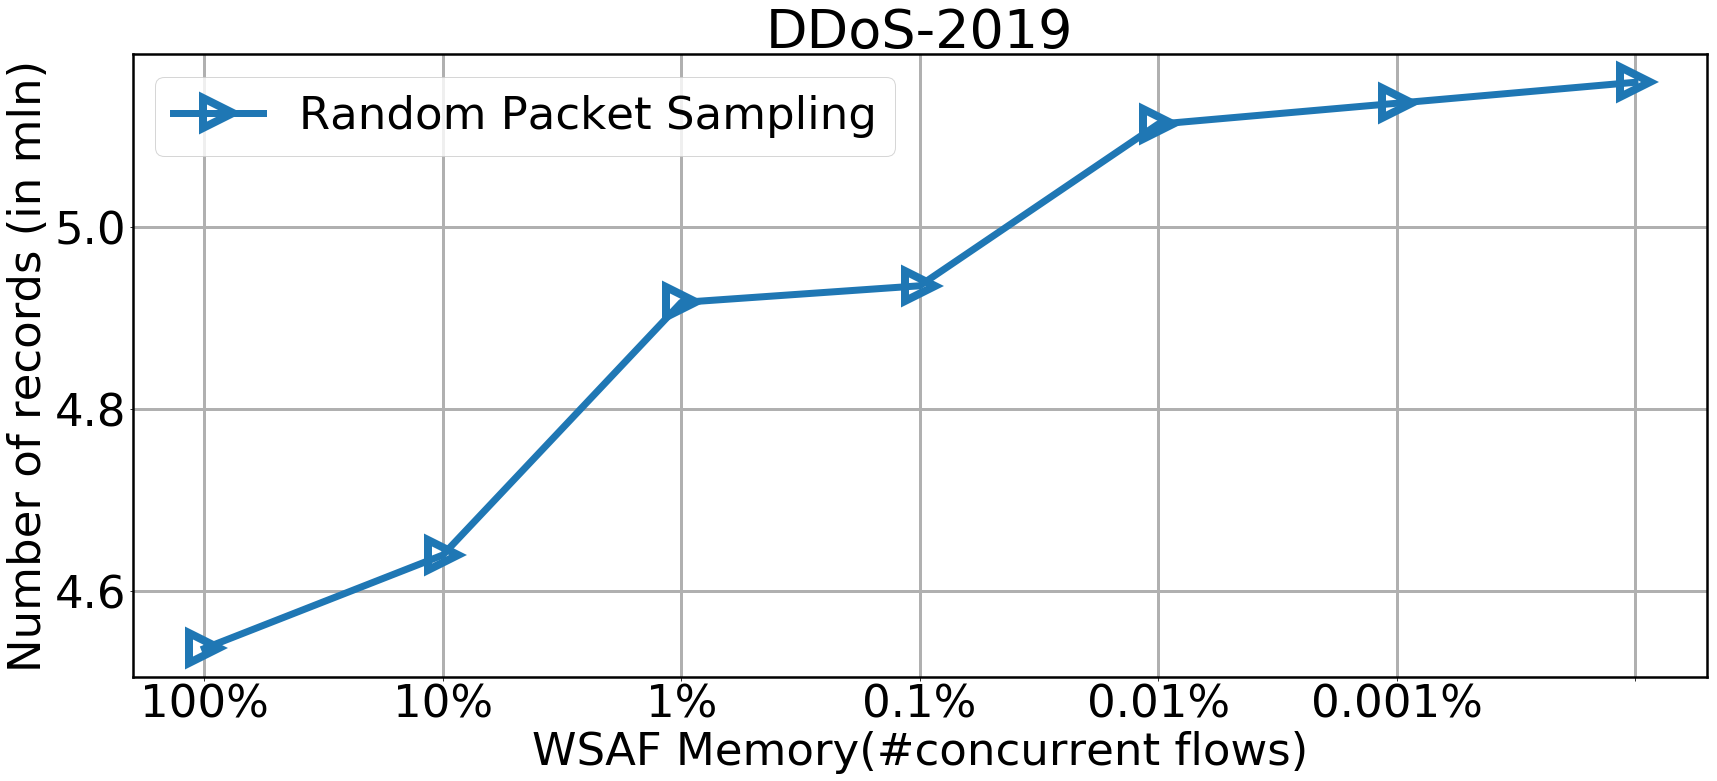

In [16]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-06/SR_10/',
        ]
records = defaultdict(list)
sampler_names = None
mln = 10**6
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i]/mln)

        

#drawing
N = len(roots)
ind = np.arange(N)

font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']

for i,name in enumerate(sampler_names):
    print('{:30}'.format(sampler_names[i]),records[name])
    ax.plot(ind,records[name],label=sampler_names[i],linewidth=7,marker=markers[i],markeredgewidth=8,markersize=30,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title('DDoS-2019')
plt.ylabel('Number of records (in mln)')
plt.xlabel('WSAF Memory(#concurrent flows)')
#plt.yscale('log')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
#ax.set_ylim(3.80,6.2)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/effect_on_records.png', bbox_inches='tight',dpi=100)
plt.show()